Оценка уровня суицидов в различных странах по социально-экономическим данным с применением методов машинного обучения
==========================================================

**Подготовка данных**
====================

In [1]:
#Импортируем пакеты и библиотеки
import pandas as pd
import numpy as np
import altair as alt
import csv

In [2]:
#Прочитаем csv файл
df = pd.read_csv("Сountries.csv", delimiter=',')

In [3]:
#Проверяем на заполненность
df.isna().sum()* 100 / len(df)

страна                           0.000000
год                              0.000000
пол                              0.000000
возраст                          0.000000
количество_самоубийства          0.000000
население                        0.000000
самоубийства_на_100к_человек     0.000000
страна-год                       0.000000
ИЧР_за_год                      69.224333
ввп_за_год ($)                   0.000000
ввп_на_душу_населения ($)        0.000000
поколение                        0.000000
dtype: float64

In [4]:
#Проверка имен столбцов
df.columns

Index(['страна', 'год', 'пол', 'возраст', 'количество_самоубийства',
       'население', 'самоубийства_на_100к_человек', 'страна-год', 'ИЧР_за_год',
       'ввп_за_год ($) ', 'ввп_на_душу_населения ($)', 'поколение'],
      dtype='object')

In [5]:
#Переименуем столбцы для удобства
df.columns=['страна', 'год', 'пол', 'возраст', 'количество_самоубийств', 'население',
       'самоубийства_на_100к_человек', 'страна-год','ИЧР_за_год', 'ВВП_за_год',
       'ВВП_на_душу_населения', 'поколение']

In [6]:
#Удалим ненужные столбцы
df = df.drop(['поколение', 'страна-год'], axis=1)

In [7]:
#Заполним отсутствующие значения в столбце средним значением ИЧР для каждой страны
df['ИЧР_за_год'] = df.ИЧР_за_год.fillna(df.groupby(["страна"])["ИЧР_за_год"].transform(np.mean))
#Оставшиеся отсутсвующие значения заполним 0
df['ИЧР_за_год'] = np.where(df.ИЧР_за_год.isna(), 0, df.ИЧР_за_год)

In [8]:
#Проверим содержание нулевого значения в столбцах
df.isna().sum()* 100 / len(df)

страна                          0.0
год                             0.0
пол                             0.0
возраст                         0.0
количество_самоубийств          0.0
население                       0.0
самоубийства_на_100к_человек    0.0
ИЧР_за_год                      0.0
ВВП_за_год                      0.0
ВВП_на_душу_населения           0.0
dtype: float64

In [9]:
#Прочитаем новый Excel файл с показателями индекса безработицы
indicator = pd.read_excel("Unemployment.xlsx")

In [10]:
#Проверим новый dataframe
indicator.head()

,страна,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Австралия,8.3,8.1,8.1,7.2,6.1,6.9,9.6,10.7,10.9,...,4.4,4.3,5.6,5.2,5.1,5.2,5.7,6.1,6.1,6.1
1,Австрия,3.6,3.1,3.8,2.7,2.3,2.7,3.2,3.3,4,...,5.2,4.4,5.7,5.2,4.9,5.2,5.4,6,6.2,6.2
2,Азербайджан,-,-,-,-,-,-,-,-,-,...,6.3,5.9,5.7,5.6,5.4,5.2,5,4.9,5,5
3,Албания,5.9,5.4,5.2,6,6.7,8.5,8.9,26.5,22.3,...,13.4,13.1,13.8,14,14,13.4,15.9,17.5,17.1,17.1
4,Алжир,16.9,18.4,20.1,21.8,18.1,19.8,20.3,21.4,23.2,...,13.8,11.3,10.2,10,10,11,9.8,10.6,11.2,11.2


In [11]:
#Создадим новый столбец в df
df['индекс_безработицы']=np.nan

In [12]:
#Переименуем столбцы в строковый тип
for year in range(1985, 2017):
    column_name = str(year)
    indicator.rename(columns={year: column_name}, inplace=True)

In [13]:
#В соотвествии с названием страны вычислим индекс безработицы по годам и добавим в dataframe
for i in range(df.shape[0]):
    code=df.loc[i, 'страна']
    year=df.loc[i, 'год']
    a=indicator[indicator['страна']==code][str(int(year))].values
    df.loc[i,'индекс_безработицы']=a[0]

In [14]:
#Проверим наличие пустых значений
df.isna().sum()* 100 / len(df)

страна                          0.0
год                             0.0
пол                             0.0
возраст                         0.0
количество_самоубийств          0.0
население                       0.0
самоубийства_на_100к_человек    0.0
ИЧР_за_год                      0.0
ВВП_за_год                      0.0
ВВП_на_душу_населения           0.0
индекс_безработицы              0.0
dtype: float64

In [15]:
#Преобразуем столбец 'индекс_безработицы' в числовой формат, используя функцию pd.to_numeric().
df['индекс_безработицы'] = pd.to_numeric(df['индекс_безработицы'], errors='coerce')

In [16]:
#Сгрупируем dataframe по странам
gp = df.groupby('страна')
tempo = gp.mean()['индекс_безработицы']


C:\Users\artem\AppData\Local\Temp\ipykernel_9648\1844363465.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tempo = gp.mean()['индекс_безработицы']


In [17]:
df.isna().sum()* 100 / len(df)

страна                          0.000000
год                             0.000000
пол                             0.000000
возраст                         0.000000
количество_самоубийств          0.000000
население                       0.000000
самоубийства_на_100к_человек    0.000000
ИЧР_за_год                      0.000000
ВВП_за_год                      0.000000
ВВП_на_душу_населения           0.000000
индекс_безработицы              5.773575
dtype: float64

In [18]:
#Создадим dataframe из новых данных
df_tempo=pd.DataFrame({'страна':tempo.keys(),'индекс_безработицы':tempo.values})

In [19]:
#Выполним операцию объединения по столбцу "страна" 
df.merge(df_tempo,on='страна',how='left').head()

,страна,год,пол,возраст,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы_x,индекс_безработицы_y
0,Албания,1987,мужской,15-24 лет,21,312900,6.71,0.673,"2,156,624,900",796,5.2,14.631818
1,Албания,1987,мужской,35-54 лет,16,308000,5.19,0.673,"2,156,624,900",796,5.2,14.631818
2,Албания,1987,женский,15-24 лет,14,289700,4.83,0.673,"2,156,624,900",796,5.2,14.631818
3,Албания,1987,мужской,75+ лет,1,21800,4.59,0.673,"2,156,624,900",796,5.2,14.631818
4,Албания,1987,мужской,25-34 лет,9,274300,3.28,0.673,"2,156,624,900",796,5.2,14.631818


In [20]:
#Заполним пропущенные значения индекса безработицы
df['индекс_безработицы']=df['индекс_безработицы'].fillna(df.merge(df_tempo,on='страна',how='left')['индекс_безработицы_y'])

In [21]:
#Проверим
df.head()

,страна,год,пол,возраст,количество_самоубийств,население,самоубийства_на_100к_человек,ИЧР_за_год,ВВП_за_год,ВВП_на_душу_населения,индекс_безработицы
0,Албания,1987,мужской,15-24 лет,21,312900,6.71,0.673,"2,156,624,900",796,5.2
1,Албания,1987,мужской,35-54 лет,16,308000,5.19,0.673,"2,156,624,900",796,5.2
2,Албания,1987,женский,15-24 лет,14,289700,4.83,0.673,"2,156,624,900",796,5.2
3,Албания,1987,мужской,75+ лет,1,21800,4.59,0.673,"2,156,624,900",796,5.2
4,Албания,1987,мужской,25-34 лет,9,274300,3.28,0.673,"2,156,624,900",796,5.2


In [22]:
#финальная проверка на наличие нулевых значений
df.isna().sum()* 100 / len(df)

страна                          0.0
год                             0.0
пол                             0.0
возраст                         0.0
количество_самоубийств          0.0
население                       0.0
самоубийства_на_100к_человек    0.0
ИЧР_за_год                      0.0
ВВП_за_год                      0.0
ВВП_на_душу_населения           0.0
индекс_безработицы              0.0
dtype: float64

In [23]:
#Добавляем новый столбец "регион"

Europe = ["Албания", "Россия", "Франция", "Украина", "Германия", "Польша", "Великобритания",
    "Италия", "Испания", "Венгрия", "Румыния", "Бельгия", "Беларусь", "Нидерланды", "Австрия",
    "Чехия", "Швеция", "Болгария", "Финляндия", "Литва", "Швейцария", "Сербия",
    "Португалия", "Хорватия", "Норвегия", "Дания", "Словакия", "Латвия", "Греция", "Словения",
    "Турция", "Эстония", "Грузия", "Албания", "Люксембург", "Армения", "Исландия", "Черногория",
    "Кипр", "Босния и Герцеговина", "Сан-Марино", "Мальта", "Ирландия"]
NorthAmerica = ["США", "Мексика", "Канада", "Куба", "Сальвадор", "Пуэрто-Рико",
    "Гватемала", "Коста-Рика", "Никарагуа", "Белиз", "Ямайка"]
SouthAmerica = ["Бразилия", "Колумбия", "Чили", "Эквадор", "Уругвай", "Парагвай", "Аргентина",
    "Панама", "Гайана", "Суринам"]
MiddleEast = ["Казахстан", "Узбекистан", "Киргизия", "Израиль", "Туркменистан", "Азербайджан",
    "Кувейт", "Объединенные Арабские Эмираты", "Катар", "Бахрейн", "Оман"]
Asia = ["Япония", "Республика Корея", "Таиланд", "Шри-Ланка", "Филиппины", "Новая Зеландия",
    "Австралия", "Сингапур", "Макао", "Монголия"]

def match_region(x):
    if x in Europe:
        x = 'Европа'
    elif x in NorthAmerica:
        x = 'Северная Америка'
    elif x in SouthAmerica:
        x = 'Южная Америка'
    elif x in MiddleEast:
        x = 'Ближний Восток'
    elif x in Asia:
        x = 'Азия'
    else:
        x = 'Островные государства'
    return x
  

df['регион'] = df.страна.map(lambda x: match_region(x))

In [24]:
#Проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23902 entries, 0 to 23901
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   страна                        23902 non-null  object 
 1   год                           23902 non-null  int64  
 2   пол                           23902 non-null  object 
 3   возраст                       23902 non-null  object 
 4   количество_самоубийств        23902 non-null  int64  
 5   население                     23902 non-null  int64  
 6   самоубийства_на_100к_человек  23902 non-null  float64
 7   ИЧР_за_год                    23902 non-null  float64
 8   ВВП_за_год                    23902 non-null  object 
 9   ВВП_на_душу_населения         23902 non-null  int64  
 10  индекс_безработицы            23902 non-null  float64
 11  регион                        23902 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.2+ MB


In [25]:
df['ВВП_за_год'] = df['ВВП_за_год'].astype(str)
df['ВВП_за_год'] = df['ВВП_за_год'].str.replace(',', '').astype(float)

In [26]:
new_df = df.loc[df['год'] > 2014].copy()
new_df1 = df.loc[df['год'] < 2015].copy()

In [27]:
new_df1.to_csv('Train.csv', index=False)
new_df.to_csv('Test.csv', index=False)

**Статистика по самоубийствам**
============================

In [28]:
grouped_df = df.groupby('страна')['количество_самоубийств'].sum().reset_index()

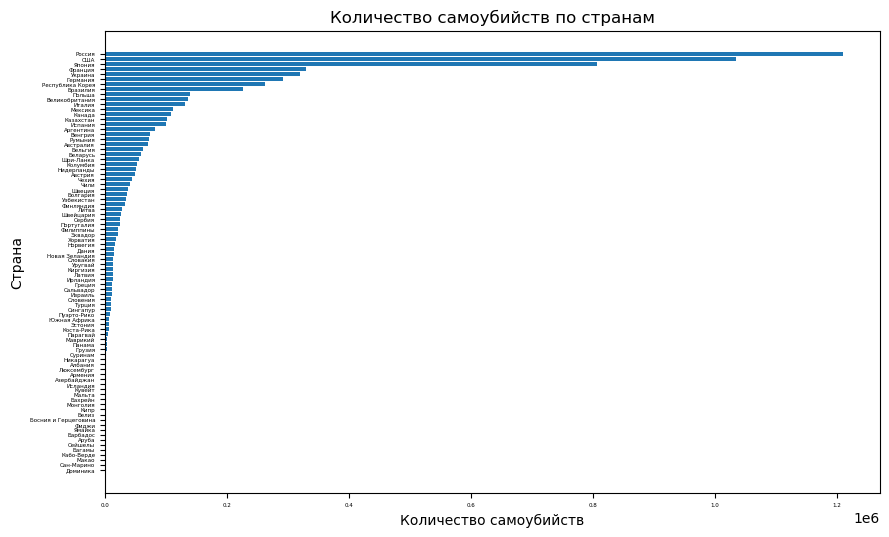

In [29]:
import matplotlib.pyplot as plt

# Сортировка стран в порядке убывания по количеству самоубийств
sorted_df = grouped_df.sort_values('количество_самоубийств', ascending=True)

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['страна'], sorted_df['количество_самоубийств'])
plt.xlabel('Количество самоубийств', fontsize=10)
plt.ylabel('Количество самоубийств', fontsize=10)
plt.tick_params(axis='x', labelsize=4)
plt.tick_params(axis='y', labelsize=4)
plt.title('Количество самоубийств по странам')
plt.xlabel('Количество самоубийств')
plt.ylabel('Страна')
plt.show()

In [30]:
grouped_df = df.groupby('страна')['количество_самоубийств'].sum()
grouped_df_sorted = grouped_df.sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Показывать все строки
display(grouped_df_sorted)

страна
Россия                  1209742
США                     1034013
Япония                   806902
Франция                  329127
Украина                  319950
Германия                 291262
Республика Корея         261730
Бразилия                 226613
Польша                   139098
Великобритания           136805
Италия                   132060
Мексика                  111139
Канада                   107561
Казахстан                101546
Испания                  100202
Аргентина                 82219
Венгрия                   73891
Румыния                   72777
Австралия                 70115
Бельгия                   62761
Беларусь                  59892
Шри-Ланка                 55641
Колумбия                  53080
Нидерланды                50833
Австрия                   50073
Чехия                     43687
Чили                      40895
Швеция                    37795
Болгария                  36388
Узбекистан                34803
Финляндия                 33677
Л

In [31]:
# Массив стран с высоким уровнем самоубийств
countries_over_100k = grouped_df_sorted[grouped_df_sorted > 100000].index.to_list()

# Массив стран со средним уровнем самоубийств
countries_over_10k = grouped_df_sorted[(grouped_df_sorted > 10000) & (grouped_df_sorted <= 100000)].index.to_list()

# Массив стран с низким уровнем самоубийств
countries_less_10k = grouped_df_sorted[grouped_df_sorted <= 10000].index.to_list()

# Вывод результатов
print("Страны с высоким уровнем самоубийств:")
print(countries_over_100k)
print()

print("Страны со средним уровнем самоубийств:")
print(countries_over_10k)
print()

print("Страны с низким уровнем самоубийств:")
print(countries_less_10k)

Страны с высоким уровнем самоубийств:
['Россия', 'США', 'Япония', 'Франция', 'Украина', 'Германия', 'Республика Корея', 'Бразилия', 'Польша', 'Великобритания', 'Италия', 'Мексика', 'Канада', 'Казахстан', 'Испания']

Страны со средним уровнем самоубийств:
['Аргентина', 'Венгрия', 'Румыния', 'Австралия', 'Бельгия', 'Беларусь', 'Шри-Ланка', 'Колумбия', 'Нидерланды', 'Австрия', 'Чехия', 'Чили', 'Швеция', 'Болгария', 'Узбекистан', 'Финляндия', 'Литва', 'Швейцария', 'Сербия', 'Португалия', 'Филиппины', 'Эквадор', 'Хорватия', 'Норвегия', 'Дания', 'Новая Зеландия', 'Словакия', 'Уругвай', 'Киргизия', 'Латвия', 'Ирландия', 'Греция', 'Сальвадор', 'Израиль', 'Словения', 'Турция', 'Сингапур']

Страны с низким уровнем самоубийств:
['Пуэрто-Рико', 'Южная Африка', 'Эстония', 'Коста-Рика', 'Парагвай', 'Маврикий', 'Панама', 'Грузия', 'Суринам', 'Никарагуа', 'Албания', 'Люксембург', 'Армения', 'Азербайджан', 'Исландия', 'Кувейт', 'Мальта', 'Бахрейн', 'Монголия', 'Кипр', 'Белиз', 'Босния и Герцеговина', '

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

df_predict = DataFrame()

for i in train['страна'].unique():
    train_by_country = train[train['страна'] == i]
    y = train_by_country['Самоубийства_на_100к_человек']
    X = train_by_country.drop(['Самоубийства_на_100к_человек', 'страна', 'население'], axis=1) 
    
    # Определение значений параметров, которые вы хотите перебрать
    param_grid = {
        'model__learning_rate': [0.1, 0.2, 0.4, 0.6],
        'model__reg_lambda': [0.3, 0.5, 0.7],
        'model__subsample': [0.8, 0.9, 1.0]
    }
    
    # Создание пайплайна для моделирования
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor())
    ])
    
    # Создание объекта GridSearchCV с указанными параметрами
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    
    # Подгонка модели с использованием GridSearchCV
    grid_search.fit(X, y)
    
    # Лучшая модель с оптимальными значениями параметров
    best_model = grid_search.best_estimator_
    
    # Прогнозирование для тестового набора данных
    test_by_country = test[test['страна'] == i]
    test_by_country['поколение_поколение G.I.'] = 0
    test_by_country_2 = test_by_country.drop(['население', 'страна'], axis=1)
    test_by_country_2 = test_by_country_2.reindex(columns=X.columns)
    predictions = best_model.predict(test_by_country_2)
    
    # Сохранение результатов прогнозирования
    test_by_country['прогноз'] = predictions
    test_by_country['прогноз_количество_суицидов'] = predictions / 100000 * test_by_country['население']
    test_result = test_by_country.loc[:, ['страна', 'год', 'прогноз', 'население', 'прогноз_количество_суицидов']]
    df_predict = df_predict.append(test_result)

df_predict
